# Review the lightcurve flag values

Authors: Midori Rollins and Melissa Graham

Review and compare flag values for the light curves.

## Set up and read in data

Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Read in the `sncosmo` results.

The fit peak magnitudes are read in but not used in this notebook.

In [2]:
fnm = '2_all_potential_snia_fits/results_sncosmos.dat'
fit_cand = np.loadtxt(fnm, dtype='str', usecols=(0))
fit_est_z = np.loadtxt(fnm, dtype='float', usecols=(1))
fit_in_zlo = np.loadtxt(fnm, dtype='float', usecols=(2))
fit_in_zhi = np.loadtxt(fnm, dtype='float', usecols=(3))
fit_z = np.loadtxt(fnm, dtype='float', usecols=(4))
fit_ze = np.loadtxt(fnm, dtype='float', usecols=(5))
fit_t0 = np.loadtxt(fnm, dtype='float', usecols=(6))
fit_t0e = np.loadtxt(fnm, dtype='float', usecols=(7))
fit_x0 = np.loadtxt(fnm, dtype='float', usecols=(8))
fit_x0e = np.loadtxt(fnm, dtype='float', usecols=(9))
fit_x1 = np.loadtxt(fnm, dtype='float', usecols=(10))
fit_x1e = np.loadtxt(fnm, dtype='float', usecols=(11))
fit_c = np.loadtxt(fnm, dtype='float', usecols=(12))
fit_ce = np.loadtxt(fnm, dtype='float', usecols=(13))
fit_pmB = np.loadtxt(fnm, dtype='float', usecols=(14))
fit_pmg = np.loadtxt(fnm, dtype='float', usecols=(15))
fit_pmr = np.loadtxt(fnm, dtype='float', usecols=(16))
fit_pmi = np.loadtxt(fnm, dtype='float', usecols=(17))
del fnm

In [3]:
tx = np.where(fit_z <= 0.)[0]
print('Number of potential SNIa which were not fit by sncosmo: ', len(tx))
del tx
tx = np.where(fit_z > 0)[0]
print('Number of SNIa that were fit with sncosmo: ', len(tx))
del tx

Number of potential SNIa which were not fit by sncosmo:  0
Number of SNIa that were fit with sncosmo:  100


### Read in and compare review flags

**Melissa's review flags**

Read Melissa's review flags from `2_all_potential_snia_fits/all_fit_snia.pdf`.

```
0 : well-sampled lightcurve, could be suffecient for a SNIa classification
1 : poorly-sample lightcurve in 1+ filter(s), would be insufficient for SNIa classification
2 : inadequately-sampled lightcurve or clearly not SN-like
```

In [4]:
fnm = '2_all_potential_snia_fits/MLG_review_ratings.txt'
mlg_review_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mlg_review_flag = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

Review the distribution of flag values.

In [5]:
values, counts = np.unique(mlg_review_flag, return_counts=True)
for v, val in enumerate(values):
    print(v, val, counts[v])
print(np.sum(counts))
del values, counts

0 0 37
1 1 7
2 2 89
133


There are many candidates that have been reviewed and since fallen off the list of potential SNIa
due to changing parameters and cuts, but that's ok. Most of them were ranked as a 2, poor quality LC for fitting.

In [6]:
for c, candid in enumerate(mlg_review_candid):
    tx = np.where(candid == fit_cand)[0]
    if len(tx) == 0:
        print(mlg_review_candid[c], mlg_review_flag[c])
    del tx

DC21bfph 2
DC21cpais 2
DC21cpcjp 0
DC21cvh 2
DC21cynfs 2
DC21cynqo 2
DC21dhgm 2
DC21djbfp 1
DC21emxv 2
DC21eoo 2
DC21eqtm 1
DC21frjc 2
DC21gocx 2
DC21grk 2
DC21ijs 2
DC21kue 2
DC21kxb 2
DC21lvlb 2
DC21mvh 2
DC21pry 2
DC21vfl 2
DC22duvcm 2
DC22earrc 2
DC22enklo 2
DC22gvcqm 2
DC22hvtet 2
DC22isyfm 2
DC23jmqzz 2
DC23jpbgx 2
DC23jurva 2
DC23kosqy 1
DC23kwcyd 2
DC23ldjbe 2


There should be no candidates that are potential SNIa yet are not reviewed.

In [7]:
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mlg_review_candid)[0]
    if len(tx) == 0:
        print(candid)
    del tx

Add an array to the set of other `fit_` arrays.

In [8]:
fit_mlgflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mlg_review_candid)[0]
    if len(tx) == 1:
        fit_mlgflag[c] = mlg_review_flag[tx[0]]
    del tx

In [9]:
tx = np.where(fit_mlgflag == -1)[0]
print('should be 0 : ', len(tx))
del tx

should be 0 :  0


**Midori's rating flags**

After looking through the PDF of fits for all candidates, all were rated as good, maybe, or bad.

> **0 = Good**: sncosmo fits our data very well; our data captures both the rise 
and fall of the supernova; has typical parameter values w/out large errors

> **1 = Maybe**: sncosmo fits our data somewhat well; not enough data/our data only 
captures the incline/decline of the supernova; may have abnormal parameter values & large errors; missing in a band

> **2 = Bad**: sncosmo does not fit our data well; our data is bad/clearly not 
type 1a-like; has abnormal parameter values w/ large errors

In [10]:
fnm = '2_all_potential_snia_fits/MR_review_ratings.txt'
mr_rating_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mr_rating_flag   = np.loadtxt(fnm, dtype='int', usecols=(1))
del fnm

Review the distribution of flag values, any candidates that
did get a rating but have subsequently fallen off the list of 
potential SNIa, and ensure there are no potential SNIa that
are missing a rating.

In [11]:
values, counts = np.unique(mr_rating_flag, return_counts=True)
for v, val in enumerate(values):
    print(v, val, counts[v])
print(np.sum(counts))
del values, counts

0 0 28
1 1 40
2 2 34
102


In [12]:
for c, candid in enumerate(mr_rating_candid):
    tx = np.where(candid == fit_cand)[0]
    if len(tx) == 0:
        print(candid)
    del tx

DC21vfl
DC21bfph
DC21cpais
DC21cpcjp
DC21cvh
DC21cynfs
DC21cynqo
DC21dhgm
DC21djbfp
DC21ecmr
DC21edhi
DC21emxv
DC21eoo
DC21eqtm
DC21eyf
DC21fchc
DC21frjc
DC21gbza
DC21gocx
DC21grk
DC21ijs
DC21kue
DC21kxb
DC21lvlb
DC21lza
DC21mvh
DC21pry
DC22duvcm
DC22earrc
DC22enklo
DC22gvcqm
DC22hvtet
DC22isyfm
DC22iteny
DC22jbqyi
DC23jmqzz
DC23jmrgj
DC23jpbgx
DC23jurva
DC23kosqy
DC23kwcyd
DC23ldjbe


In [13]:
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mr_rating_candid)[0]
    if len(tx) == 0:
        print(candid)
    del tx

DC21bcpi
DC21bohl
DC21bwajh
DC21bwbfe
DC21bxvcb
DC21cgfvi
DC21cyks
DC21djbcj
DC21dlono
DC21dqpcm
DC21dqqdr
DC21drcum
DC21drien
DC21eere
DC21fsdd
DC21gayy
DC21lbmp
DC21lqtw
DC21mp
DC21qil
DC22eathc
DC22gtbtd
DC22hirtc
DC22hvvaj
DC22hxfom
DC22iwnti
DC22jckoa
DC22jcyuz
DC23jhgml
DC23jjkcv
DC23jjmhv
DC23jqitt
DC23jwhoq
DC23jwnzq
DC23jwvwc
DC23khfqh
DC23kmybj
DC23kmzfs
DC23kwpaw
DC23lcpnh


In [14]:
fit_mrflag = np.zeros(len(fit_cand), dtype='int') - 1
for c, candid in enumerate(fit_cand):
    tx = np.where(candid == mr_rating_candid)[0]
    if len(tx) == 1:
        fit_mrflag[c] = mr_rating_flag[tx]
    del tx

/tmp/ipykernel_2302312/960326746.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fit_mrflag[c] = mr_rating_flag[tx]


In [15]:
tx = np.where(fit_mrflag == -1)[0]
print('should be 0 : ', len(tx))
del tx

should be 0 :  40


**Compare flags**

Add in a bit of scatter just so we can see how many points are at each grid location.

 * All of the candidates MLG flags as '2' are flagged by MR as '1' or '2'.
 * Most of the candidates MLG flags as '0' are flagged by MR as '0', but not all.

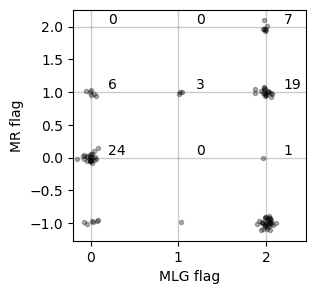

In [16]:
plt.figure(figsize=(3, 3))

r1 = np.random.normal(scale=0.05, size=len(fit_cand))
r2 = np.random.normal(scale=0.05, size=len(fit_cand))
plt.plot(fit_mlgflag+r1, fit_mrflag+r2, 'o', ms=3, alpha=0.3, color='black')

for i in [0, 1, 2]:
    plt.axvline(i, lw=1, alpha=0.2, color='black')
    for j in [0, 1, 2]:
        if i == 0:
            plt.axhline(j, lw=1, alpha=0.2, color='black')
        tx = np.where((fit_mlgflag == i) & (fit_mrflag == j))[0]
        plt.text(i+0.2, j+0.05, str(len(tx)))

# plt.grid()
plt.xlim([-0.2,2.45])
plt.xlim([-0.2,2.45])
plt.xlabel('MLG flag')
plt.ylabel('MR flag')
plt.show()